#Feature Section
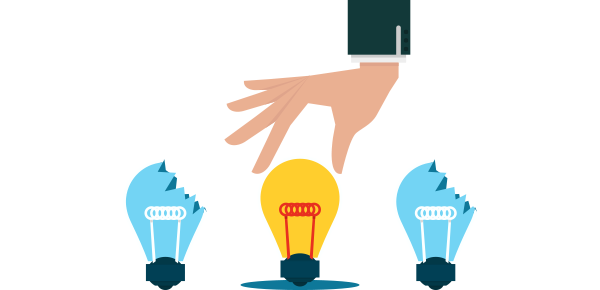

# ***What is feature Selection ? Why do we need it***

# *Benefits of Feature Selection*
1.   Reduces Overfitting
2.   Improves Accuracy
3.   Reduces Traning Time

Image Credits: GeeksforGeeks

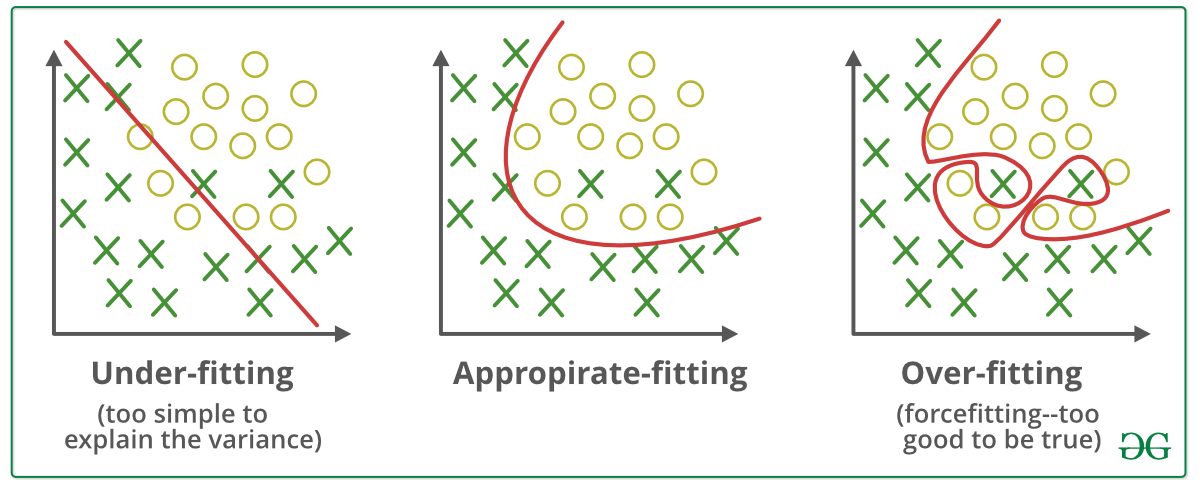

#Method 1: Univariate Selection

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

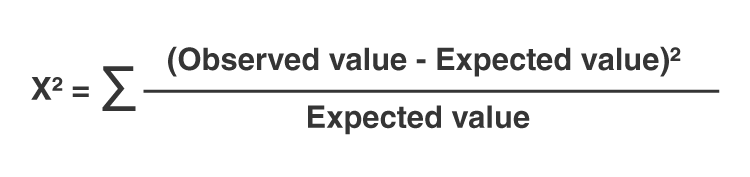

In [ ]:
#Uploading the Dataset
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
#Importing Dataset
data = pd.read_csv("train.csv")
print(data.describe)
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

<bound method NDFrame.describe of       battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
0               842     0          2.2  ...             0     1            1
1              1021     1          0.5  ...             1     0            2
2               563     1          0.5  ...             1     0            2
3               615     1          2.5  ...             0     0            2
4              1821     1          1.2  ...             1     0            1
...             ...   ...          ...  ...           ...   ...          ...
1995            794     1          0.5  ...             1     0            0
1996           1965     1          2.6  ...             1     1            2
1997           1911     0          0.9  ...             1     0            3
1998           1512     0          0.9  ...             1     1            0
1999            510     1          2.0  ...             1     1            3

[2000 rows x 21 columns]>


In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


#Method 2:  Feature Importance

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

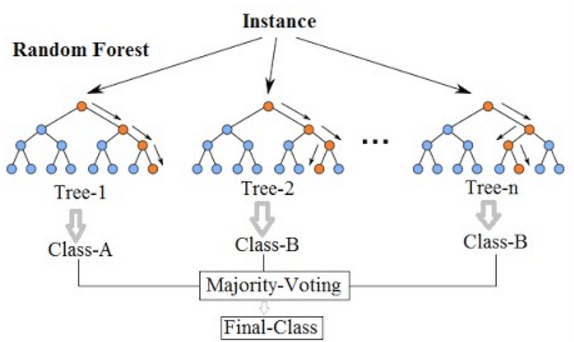

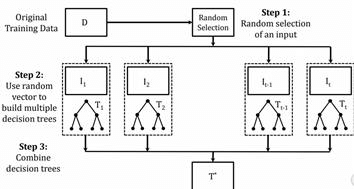

[0.06040972 0.01919253 0.03288102 0.02035242 0.03245982 0.01631443
 0.0354283  0.03364129 0.03681443 0.03344748 0.03443074 0.04600535
 0.04935826 0.39332238 0.03401229 0.03438787 0.0346399  0.01415044
 0.01834058 0.02041073]


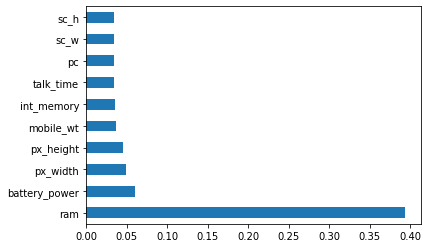

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#Method 3: Correlation Matrix with Heatmap

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

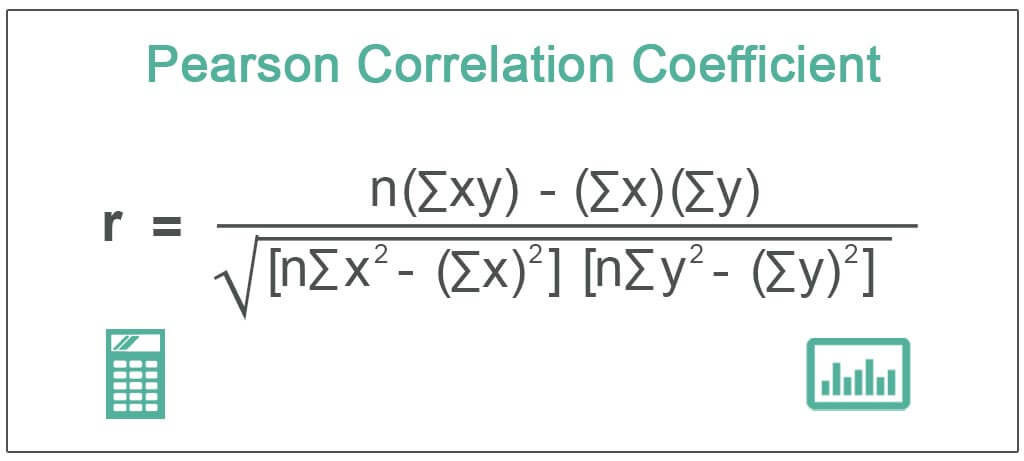

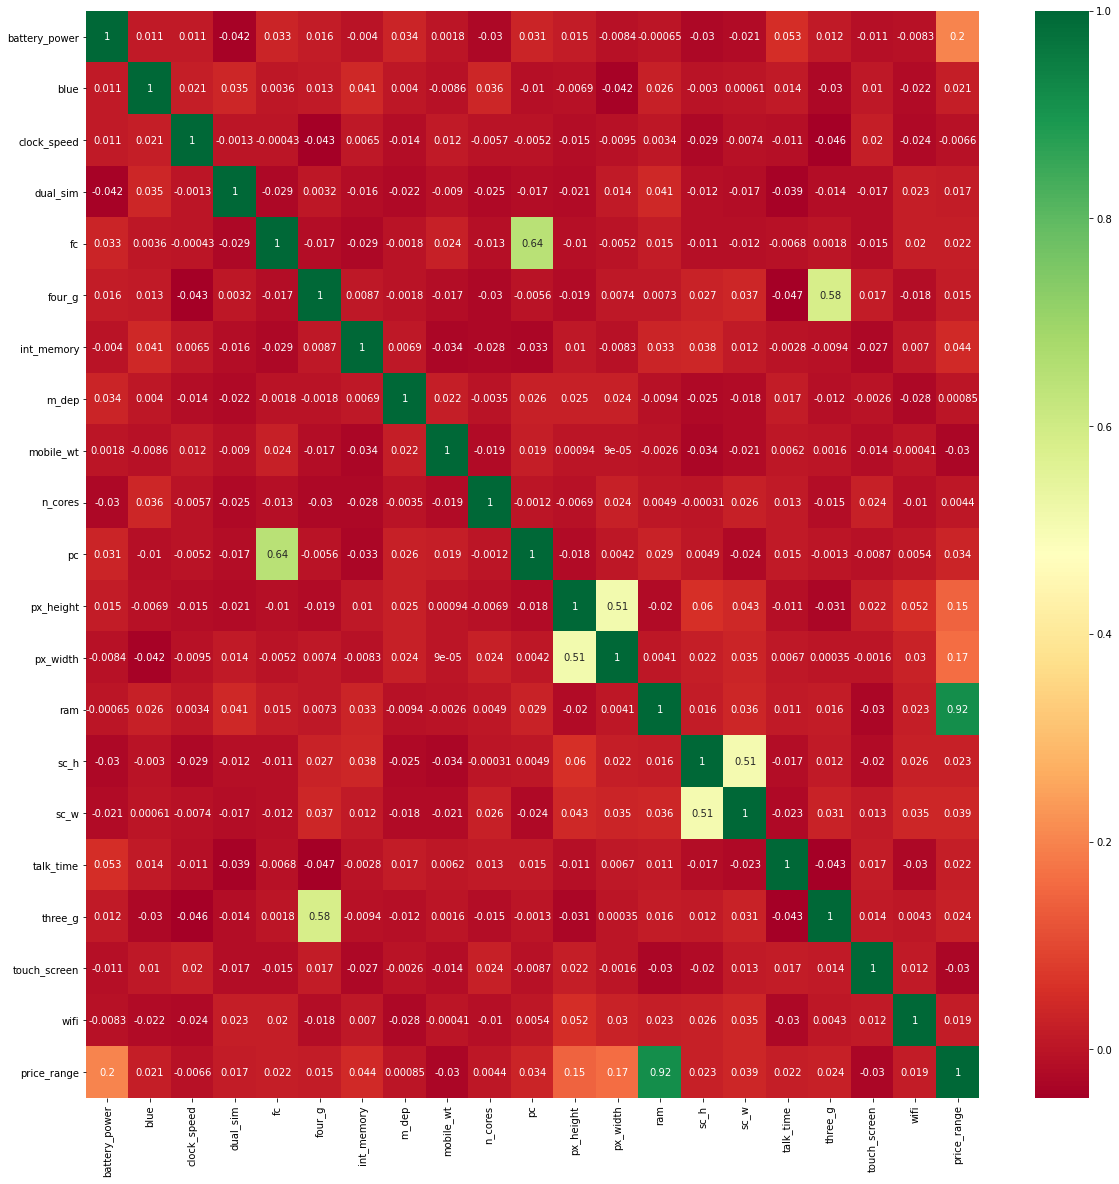

In [ ]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")